# Superstore Sales & Profit Analysis
Dataset containing Sales & Profits of a Superstore.
dataset availible on [Kaggale](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

# EDA
I'll use a predefine function by me for EDA.

In [3]:
import pandas as pd
import numpy as np

def eda(df):
    """
    Comprehensive EDA Summary:
    - Shape, memory, duplicate rows
    - Column-wise missing and duplicate counts
    - Numeric and categorical summaries
    """

    print("=" * 70)
    print("                 ✨ COMPREHENSIVE EDA REPORT ✨")
    print("=" * 70)

    # 1️⃣ BASIC INFO
    print("\n💡 BASIC INFO & MEMORY")
    print("-" * 70)
    print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
    memory_mb = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Memory Usage: {memory_mb:.2f} MB")
    total_dup_rows = df.duplicated().sum()
    print(f"Total Duplicate Rows: {total_dup_rows}")
    print("=" * 70, "\n")

    # 2️⃣ COLUMN-WISE DATA QUALITY
    print("📊 COLUMN-WISE DATA QUALITY")
    print("-" * 70)
    missing_count = df.isna().sum()
    missing_percent = (missing_count / df.shape[0]) * 100
    duplicate_count = df.apply(lambda x: x.duplicated().sum())

    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notna().sum(),
        'Missing Count': missing_count,
        'Missing %': missing_percent.round(2),
        'Duplicate Count': duplicate_count
    })

    display(summary.sort_values('Missing %', ascending=False))
    print("=" * 70, "\n")

    # 3️⃣ NUMERICAL FEATURES
    print("🔢 NUMERICAL STATISTICS")
    print("-" * 70)
    numerical_df = df.select_dtypes(include=np.number)
    if not numerical_df.empty:
        print(f"Analyzing {numerical_df.shape[1]} numerical features...")
        display(numerical_df.describe().T.round(2))
    else:
        print("⚠️ No numerical columns found.")
    print("=" * 70, "\n")

    # 4️⃣ CATEGORICAL FEATURES
    print("🏷️ CATEGORICAL FEATURE ANALYSIS")
    print("-" * 70)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    HIGH_CARDINALITY_THRESHOLD = 50

    if len(categorical_cols) > 0:
        cat_summary = []
        for col in categorical_cols:
            n_unique = df[col].nunique()
            top_3_values = df[col].value_counts().head(3).index.tolist()
            if n_unique == df.shape[0]:
                status = "Potential ID Column (Unique)"
            elif n_unique > HIGH_CARDINALITY_THRESHOLD:
                status = "High Cardinality (Review)"
            else:
                status = "Normal"
            cat_summary.append({
                'Feature': col,
                'Unique Count': n_unique,
                'Status': status,
                'Top 3 Values': str(top_3_values)
            })
        cat_df = pd.DataFrame(cat_summary).set_index('Feature')
        display(cat_df)
    else:
        print("⚠️ No categorical columns found.")
    print("=" * 70)
    print("\n✅ EDA SUMMARY COMPLETE")


In [4]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [5]:
eda(df)

                 ✨ COMPREHENSIVE EDA REPORT ✨

💡 BASIC INFO & MEMORY
----------------------------------------------------------------------
Total Rows: 9994, Total Columns: 21
Memory Usage: 9.21 MB
Total Duplicate Rows: 0

📊 COLUMN-WISE DATA QUALITY
----------------------------------------------------------------------


,Data Type,Non-Null Count,Missing Count,Missing %,Duplicate Count
Row ID,int64,9994,0,0.0,0
Order ID,object,9994,0,0.0,4985
Order Date,object,9994,0,0.0,8757
Ship Date,object,9994,0,0.0,8660
Ship Mode,object,9994,0,0.0,9990
Customer ID,object,9994,0,0.0,9201
Customer Name,object,9994,0,0.0,9201
Segment,object,9994,0,0.0,9991
Country,object,9994,0,0.0,9993
City,object,9994,0,0.0,9463



🔢 NUMERICAL STATISTICS
----------------------------------------------------------------------
Analyzing 6 numerical features...


,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.50,2885.16,1.00,2499.25,4997.50,7495.75,9994.00
Postal Code,9994.0,55190.38,32063.69,1040.00,23223.00,56430.50,90008.00,99301.00
Sales,9994.0,229.86,623.25,0.44,17.28,54.49,209.94,22638.48
Quantity,9994.0,3.79,2.23,1.00,2.00,3.00,5.00,14.00
Discount,9994.0,0.16,0.21,0.00,0.00,0.20,0.20,0.80
Profit,9994.0,28.66,234.26,-6599.98,1.73,8.67,29.36,8399.98



🏷️ CATEGORICAL FEATURE ANALYSIS
----------------------------------------------------------------------


,Unique Count,Status,Top 3 Values
Feature,,,
Order ID,5009,High Cardinality (Review),"['CA-2017-100111', 'CA-2017-157987', 'CA-2016-..."
Order Date,1237,High Cardinality (Review),"['9/5/2016', '9/2/2017', '11/10/2016']"
Ship Date,1334,High Cardinality (Review),"['12/16/2015', '9/26/2017', '11/21/2017']"
Ship Mode,4,Normal,"['Standard Class', 'Second Class', 'First Class']"
Customer ID,793,High Cardinality (Review),"['WB-21850', 'MA-17560', 'JL-15835']"
Customer Name,793,High Cardinality (Review),"['William Brown', 'Matt Abelman', 'John Lee']"
Segment,3,Normal,"['Consumer', 'Corporate', 'Home Office']"
Country,1,Normal,['United States']
City,531,High Cardinality (Review),"['New York City', 'Los Angeles', 'Philadelphia']"



✅ EDA SUMMARY COMPLETE


# Data Preparation and Time Series Analysis

In [6]:
# Convert Date Columns to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [7]:
# Extract Time Components for Time Series Analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month_name() # For plotting labels

In [8]:
# Profit Margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Time Series Analysis
The next major step is to understand the temporal trends. We need to answer:

1. Yearly Growth: How have Sales and Profit trended year-over-year?

2. Seasonality: Is there a seasonal pattern? Which months are strongest/weakest?

This gives a business perspective on growth and predictability.

In [9]:
# Aggregate data by Year for Y-o-Y growth
yearly_trend = df.groupby('Order Year')[['Sales', 'Profit']].sum().reset_index()

# Extract numerical month for sorting
df['Order Month Num'] = df['Order Date'].dt.month

# Aggregate data by Month (within each year) for Seasonality
monthly_trend = df.groupby(['Order Year', 'Order Month Num', 'Order Month'])[['Sales', 'Profit']].sum().reset_index()

# Sort the monthly data for plotting
monthly_trend = monthly_trend.sort_values(by=['Order Year', 'Order Month Num'])

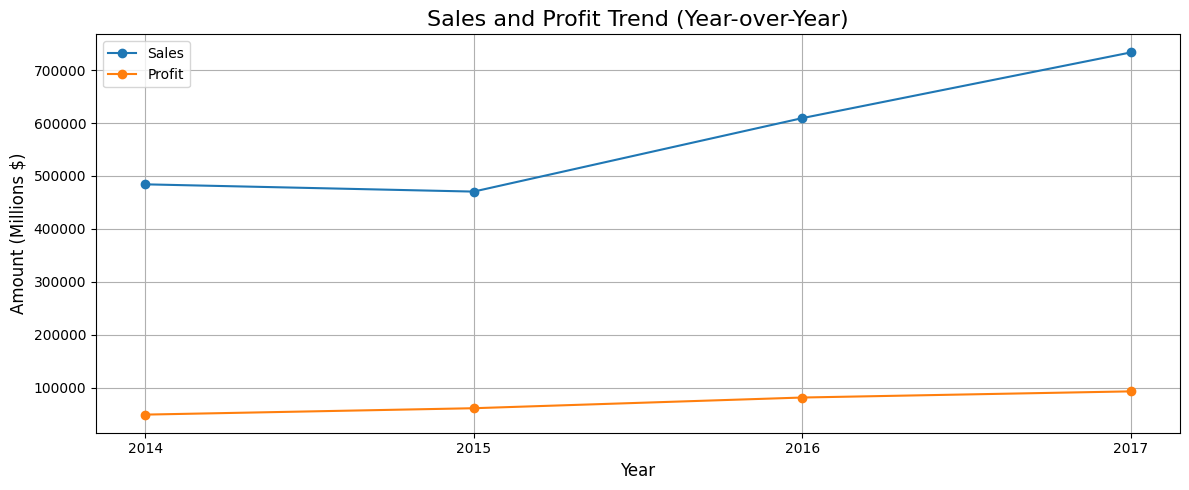

In [10]:
# Yearly Trend Plot (Sales and Profit)
plt.figure(figsize=(12, 5))
plt.plot(yearly_trend['Order Year'], yearly_trend['Sales'], label='Sales', marker='o')
plt.plot(yearly_trend['Order Year'], yearly_trend['Profit'], label='Profit', marker='o')

plt.title('Sales and Profit Trend (Year-over-Year)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Amount (Millions $)', fontsize=12)
plt.xticks(yearly_trend['Order Year'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('yearly_trend.png')
plt.show()

**Key Insight**: Both Sales and Profit have increased year-over-year from 2014 to 2017, with 2017 being the strongest year for the Superstore. The minor dip in sales between 2014 and 2015 should be noted, but the overall trend is strong growth.

# Monthly Trend Plot (Seasonality)

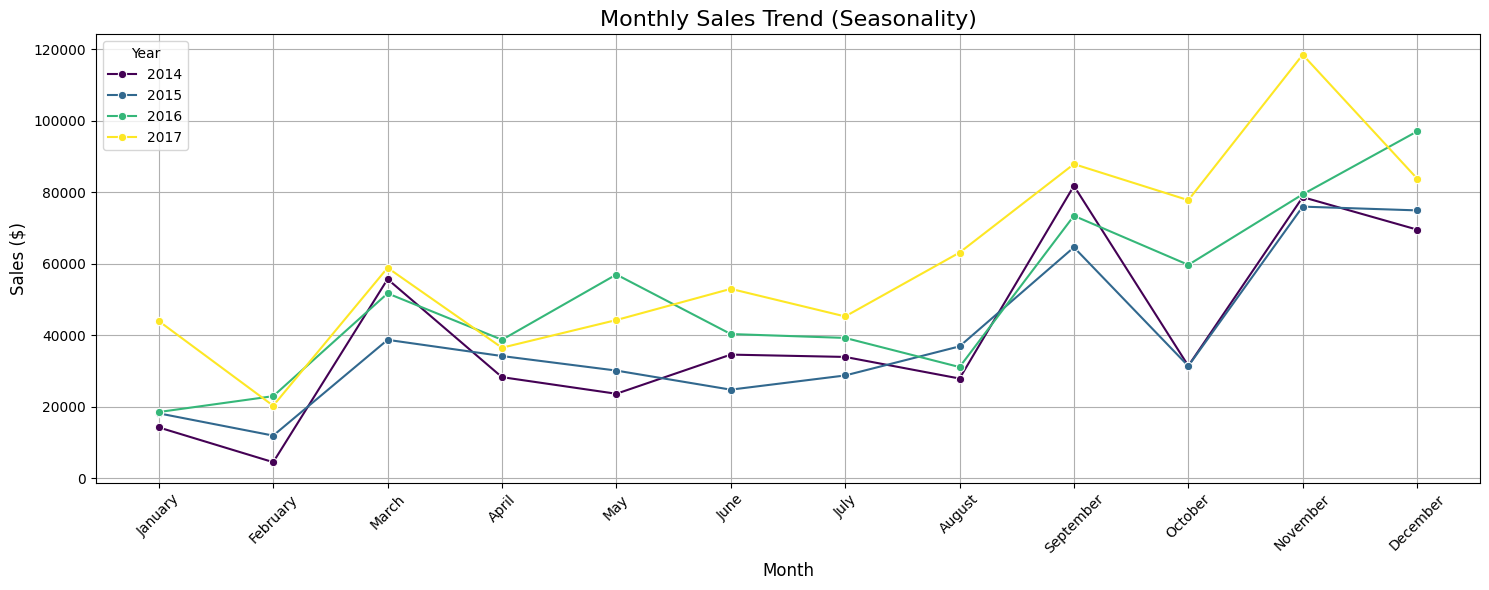

In [11]:
# Monthly Trend Plot (Seasonality)
plt.figure(figsize=(15, 6))
# Create a line plot for Sales, separating lines by Order Year
sns.lineplot(
    data=monthly_trend,
    x='Order Month',
    y='Sales',
    hue='Order Year',
    marker='o',
    dashes=False,
    palette='viridis'
)

plt.title('Monthly Sales Trend (Seasonality)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('monthly_sales_seasonality.png')
plt.show()

# Monthly Trend (Seasonality)
The monthly sales plot reveals a strong, recurring seasonal pattern:

**Key Insight**:

1. **Strong Seasonality**: Sales consistently peak in the last quarter (October, November, and December) across all four years.

2. **Weakest Periods**: Sales are typically weakest at the beginning of the year (January and February), common in retail after the holiday rush.

3. **Growth**: The peak month's sales in 2017 are significantly higher than the peak months of previous years, confirming that the growth is not only annual but also accelerating during the busy season.

# Geographical and Segment Analysis
We will combine two crucial insights: Region and Customer Segment.

In [12]:
# Aggregate data by Segment and Region
segment_region_profit = df.groupby(['Segment', 'Region'])['Profit'].sum().reset_index()

--- Profit by Segment and Region Data ---
        Segment   Region      Profit
3      Consumer     West  57450.6040
1      Consumer     East  41190.9843
7     Corporate     West  34437.4299
2      Consumer    South  26913.5728
9   Home Office     East  26709.2168
5     Corporate     East  23622.5789
4     Corporate  Central  18703.9020
11  Home Office     West  16530.4150
6     Corporate    South  15215.2232
8   Home Office  Central  12438.4124
0      Consumer  Central   8564.0481
10  Home Office    South   4620.6343


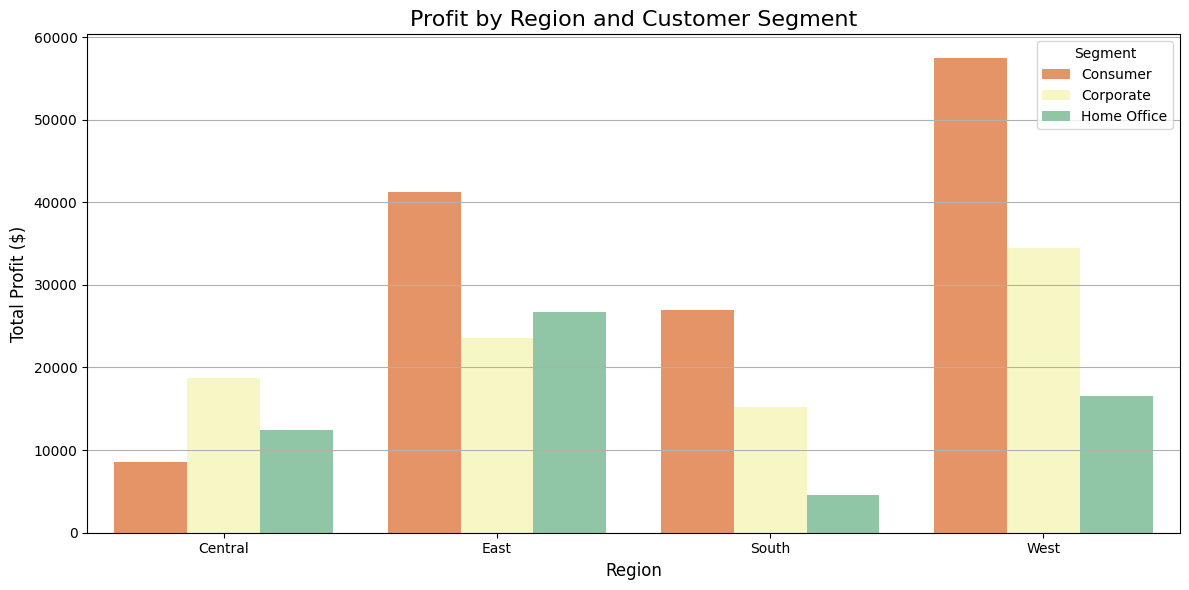

In [13]:
# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=segment_region_profit,
    x='Region',
    y='Profit',
    hue='Segment',
    palette='Spectral'
)

plt.title('Profit by Region and Customer Segment', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Segment')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('profit_by_segment_and_region.png')

print("--- Profit by Segment and Region Data ---")
print(segment_region_profit.sort_values(by='Profit', ascending=False))

## Key Insights:
1. **Top Profit Engine**: The Consumer Segment in the West Region is the single largest contributor to the Superstore's total profit.
2. **Weakest Link**: The Consumer Segment in the Central Region generates the lowest profit by a significant margin ($\approx \$8.5k$). This reinforces the earlier finding that the Central Region is the weakest area.

# Root Cause Analysis: The Impact of Discounting

We will analyze the relationship between the Discount offered and the resulting Profit Margin. This analysis will provide solid, data-backed evidence for your recommendation on adjusting pricing strategy.

In [14]:
# 1. Define Discount Bins and Labels
discount_bins = [-0.01, 0.0, 0.20, 0.40, 0.60, 0.80, 1.0] # Use -0.01 to ensure 0.0 is included in the first bin
discount_labels = ['0% Discount', '1% - 20%', '21% - 40%', '41% - 60%', '61% - 80%', '81% - 100%']

# Create the Discount Group column
df['Discount Group'] = pd.cut(
    df['Discount'],
    bins=discount_bins,
    labels=discount_labels,
    right=True,
    include_lowest=True
)

# 2. Aggregate data by Discount Group and Category
discount_impact = df.groupby(['Discount Group', 'Category'], observed=True)['Profit Margin'].mean().reset_index()

--- Average Profit Margin Data by Discount Group and Category ---
   Discount Group         Category  Profit Margin
0     0% Discount        Furniture      29.001196
1     0% Discount  Office Supplies      36.711090
2     0% Discount       Technology      28.925570
3        1% - 20%        Furniture       7.510292
4        1% - 20%  Office Supplies      23.171578
5        1% - 20%       Technology      11.103862
6       21% - 40%        Furniture     -17.631151
7       21% - 40%       Technology     -14.432773
8       41% - 60%        Furniture     -65.960591
9       41% - 60%       Technology     -20.333333
10      61% - 80%        Furniture    -166.444444
11      61% - 80%  Office Supplies    -122.151961
12      61% - 80%       Technology    -104.782609


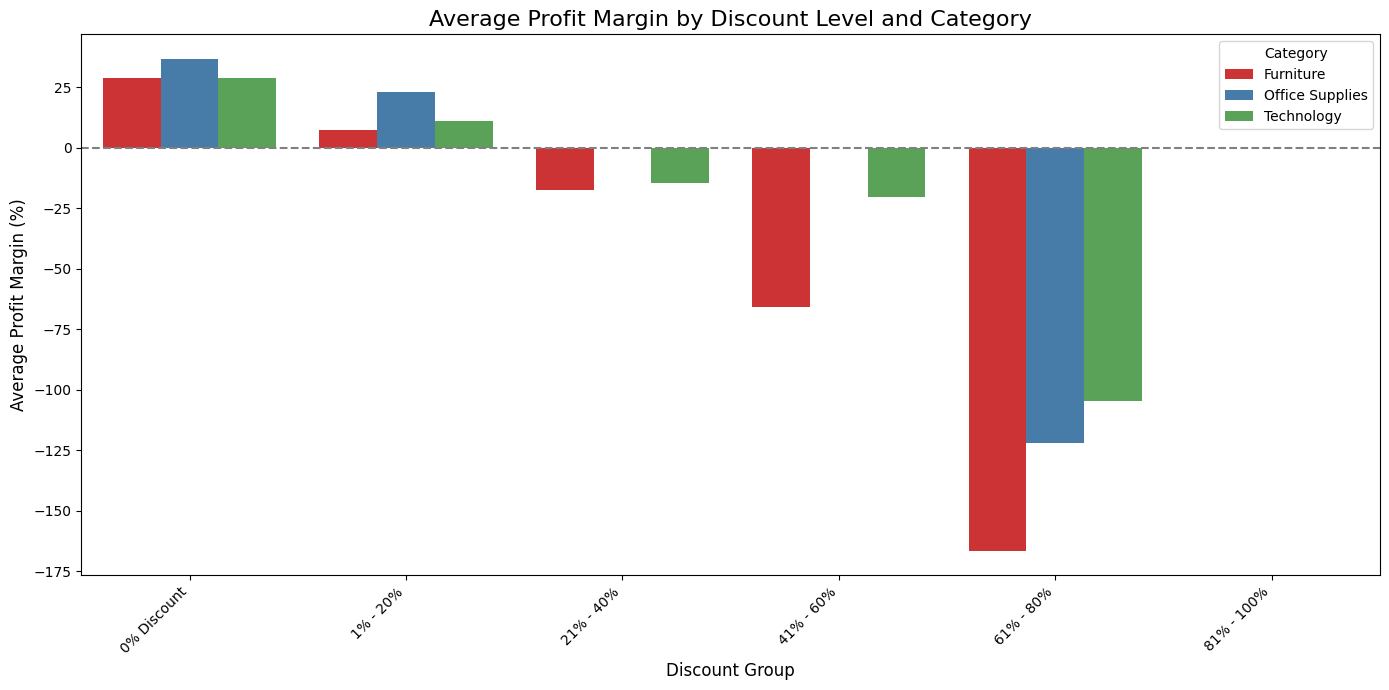

In [15]:
# 3. Create a grouped bar chart for Profit Margin by Discount Group
plt.figure(figsize=(14, 7))
sns.barplot(
    data=discount_impact,
    x='Discount Group',
    y='Profit Margin',
    hue='Category',
    palette='Set1'
)

plt.title('Average Profit Margin by Discount Level and Category', fontsize=16)
plt.xlabel('Discount Group', fontsize=12)
plt.ylabel('Average Profit Margin (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='grey', linestyle='--') # a zero line to easily see losses
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.savefig('discount_vs_profit_margin.png')

print("--- Average Profit Margin Data by Discount Group and Category ---")
print(discount_impact)

## Key Findings on Discounting:

1. **Profitability Threshold (1-20% Discount):**
* All three categories (Furniture, Office Supplies, Technology) are profitable when the discount is $20\%$ or less.Office Supplies maintains the highest margin in this band ($\approx 23\%$).
2. **The Danger Zone (21-40% Discount):**
* Furniture immediately plunges to a loss ($\approx -17.6\%$ margin).Technology also drops into a loss ($\approx -14.4\%$ margin).This confirms that discounts greater than $20\%$ are highly destructive, especially for Furniture and Technology.

3. **The Catastrophe (41%+ Discount):**
* Discounts between $61\%$ and $80\%$ result in massive losses across the board, with Furniture losing an average of over $166\%$ of the sale price. These are highly subsidized sales and should be severely limited or eliminated.